In [1]:
import pandas as pd

# Muat data dengan pd.read_excel
df = pd.read_excel(r"D:\1. SKRIPSI\Paling Baruu\Combined Data.xlsx")

# Lihat struktur dataframe
df.info()

# Lihat 10 baris pertama (biar lebih jelas)
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Number                               16 non-null     int64  
 1   Time_Group                           16 non-null     object 
 2   Time_Interval                        16 non-null     object 
 3   MC_Vehicle_kend/15menit_Weekday      16 non-null     int64  
 4   LV_Vehicle_kend/15menit_Weekday      16 non-null     int64  
 5   HV_Vehicle_kend/15menit_Weekday      16 non-null     int64  
 6   Total_Vehicle_Count_Weekday          16 non-null     int64  
 7   MC_Vehicle_kend/15menit_Weekend      16 non-null     int64  
 8   LV_Vehicle_kend/15menit_Weekend      16 non-null     int64  
 9   HV_Vehicle_kend/15menit_Weekend      16 non-null     int64  
 10  Total_Vehicle_Count_Weekend          16 non-null     int64  
 11  MC_PCU/Hour_Weekday               

,Number,Time_Group,Time_Interval,MC_Vehicle_kend/15menit_Weekday,LV_Vehicle_kend/15menit_Weekday,HV_Vehicle_kend/15menit_Weekday,Total_Vehicle_Count_Weekday,MC_Vehicle_kend/15menit_Weekend,LV_Vehicle_kend/15menit_Weekend,HV_Vehicle_kend/15menit_Weekend,...,Space_Mean_Speed_Weekday,Space_Mean_Speed_Weekend,RoadSideActivity_Pedestrian_Weekday,RoadSideActivity_ParkStop_Weekday,RoadSideActivity_ExitEntry_Weekday,RoadSideActivity_NonMotor_Weekday,RoadSideActivity_Pedestrian_Weekend,RoadSideActivity_ParkStop_Weekend,RoadSideActivity_ExitEntry_Weekend,RoadSideActivity_NonMotor_Weekend
0,1,Morning-1,06:30 - 06:45,1017,96,13,1126,809,71,11,...,33.370412,36.173633,15.0,21.5,69.0,22.0,19.5,15.5,60.5,15.5
1,2,Morning-2,06:45 - 07:00,1394,121,12,1527,892,92,26,...,31.098825,30.252101,21.5,30.5,78.0,18.5,22.5,34.5,82.5,21.0
2,3,Morning-3,07:00 - 07:15,1252,143,20,1415,903,99,20,...,29.693171,33.644860,23.5,36.0,85.5,24.5,20.0,20.0,63.5,18.0
3,4,Morning-4,07:15 - 07:30,1319,137,16,1472,1007,130,23,...,29.900332,29.107374,25.0,33.5,83.0,22.0,24.0,32.5,88.5,25.0
4,5,Morning-5,07:30 - 07:45,1470,164,21,1655,1306,132,23,...,30.633084,30.518820,22.0,32.0,76.0,22.0,22.5,27.0,77.0,20.5
5,6,Morning-6,07:45 - 08:00,1512,164,29,1705,1334,141,27,...,30.885381,33.161385,21.0,34.5,78.5,23.5,19.0,20.0,66.0,18.0
6,7,Morning-7,08:00 - 08:15,1162,144,27,1333,1104,117,22,...,31.402652,31.523643,22.0,34.0,71.0,23.5,23.0,26.5,69.5,19.0
7,8,Morning-8,08:15 - 08:30,989,140,17,1146,910,129,31,...,34.642032,35.019455,18.0,22.0,66.5,18.5,19.5,16.5,62.5,19.5
8,9,Evening-1,15:30 - 15:45,1084,169,25,1278,983,162,24,...,31.152648,34.390524,11.5,17.0,69.0,21.5,16.5,20.5,66.5,18.5
9,10,Evening-2,15:45 - 16:00,1422,201,29,1652,1319,207,27,...,29.004189,29.850746,27.0,21.0,72.5,21.5,16.5,26.5,92.5,23.0


In [2]:
import pandas as pd
import numpy as np

# 1. Membaca data asli dari Excel
original_df = pd.read_excel(r"D:\1. SKRIPSI\Paling Baruu\Combined Data.xlsx")  # Ubah path jika perlu

# 2. Buat dummy interpolated_df jika tidak ada data interpolasi
interpolated_df = pd.DataFrame(columns=original_df.columns)

# 3. Ambil kolom numerik
numeric_cols = original_df.select_dtypes(include='number').columns.tolist()

# 4. Menyintesis data
synthetic_rows = []
np.random.seed(42)

for i in range(len(original_df)):
    row = original_df.iloc[i]
    for scenario in range(2):  # 2 skenario per baris
        original_values = row[numeric_cols].astype(float).values
        variation = np.random.uniform(0.9, 1.1, size=len(numeric_cols))
        synthetic_array = np.around(original_values * variation, decimals=2)
        synthetic_dict = dict(zip(numeric_cols, synthetic_array))
        synthetic_dict["Time_Group"] = f"Synthetic-{i+1}-{scenario+1}"
        synthetic_dict["Time_Interval"] = row.get("Time_Interval", np.nan)
        synthetic_dict["Data_Type"] = "synthetic"
        synthetic_rows.append(synthetic_dict)

# 5. Buat DataFrame sintetik dan sesuaikan kolom
synthetic_df = pd.DataFrame(synthetic_rows)
synthetic_df = synthetic_df.reindex(columns=original_df.columns)

# 6. Gabungkan semua data
combined_df = pd.concat([original_df, interpolated_df, synthetic_df], ignore_index=True)

# 7. Tampilkan hasil akhir
print("Preview Data Gabungan:")
display(combined_df.head())


Preview Data Gabungan:


C:\Users\Asus\AppData\Local\Temp\ipykernel_25248\2554083271.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([original_df, interpolated_df, synthetic_df], ignore_index=True)


,Number,Time_Group,Time_Interval,MC_Vehicle_kend/15menit_Weekday,LV_Vehicle_kend/15menit_Weekday,HV_Vehicle_kend/15menit_Weekday,Total_Vehicle_Count_Weekday,MC_Vehicle_kend/15menit_Weekend,LV_Vehicle_kend/15menit_Weekend,HV_Vehicle_kend/15menit_Weekend,...,Space_Mean_Speed_Weekday,Space_Mean_Speed_Weekend,RoadSideActivity_Pedestrian_Weekday,RoadSideActivity_ParkStop_Weekday,RoadSideActivity_ExitEntry_Weekday,RoadSideActivity_NonMotor_Weekday,RoadSideActivity_Pedestrian_Weekend,RoadSideActivity_ParkStop_Weekend,RoadSideActivity_ExitEntry_Weekend,RoadSideActivity_NonMotor_Weekend
0,1.0,Morning-1,06:30 - 06:45,1017.0,96.0,13.0,1126.0,809.0,71.0,11.0,...,33.370412,36.173633,15.0,21.5,69.0,22.0,19.5,15.5,60.5,15.5
1,2.0,Morning-2,06:45 - 07:00,1394.0,121.0,12.0,1527.0,892.0,92.0,26.0,...,31.098825,30.252101,21.5,30.5,78.0,18.5,22.5,34.5,82.5,21.0
2,3.0,Morning-3,07:00 - 07:15,1252.0,143.0,20.0,1415.0,903.0,99.0,20.0,...,29.693171,33.644860,23.5,36.0,85.5,24.5,20.0,20.0,63.5,18.0
3,4.0,Morning-4,07:15 - 07:30,1319.0,137.0,16.0,1472.0,1007.0,130.0,23.0,...,29.900332,29.107374,25.0,33.5,83.0,22.0,24.0,32.5,88.5,25.0
4,5.0,Morning-5,07:30 - 07:45,1470.0,164.0,21.0,1655.0,1306.0,132.0,23.0,...,30.633084,30.518820,22.0,32.0,76.0,22.0,22.5,27.0,77.0,20.5


In [3]:
# Lanjutkan ke tahap pelatihan model menggunakan dataset hasil gabungan

# Muat kembali dataset hasil ekspansi
df = pd.read_excel(r"D:\1. SKRIPSI\Paling Baruu\Combined_Traffic_Data_Expanded.xlsx")
# Cek kolom yang bisa digunakan untuk prediksi dan target
df.columns


Index(['Number', 'Time_Group', 'Time_Interval',
       'MC_Vehicle_kend/15menit_Weekday', 'LV_Vehicle_kend/15menit_Weekday',
       'HV_Vehicle_kend/15menit_Weekday', 'Total_Vehicle_Count_Weekday',
       'MC_Vehicle_kend/15menit_Weekend', 'LV_Vehicle_kend/15menit_Weekend',
       'HV_Vehicle_kend/15menit_Weekend', 'Total_Vehicle_Count_Weekend',
       'MC_PCU/Hour_Weekday', 'LV_PCU/Hour_Weekday', 'HV_PCU/Hour_Weekday',
       'Total_PCU/Hour_Weekday', 'MC_PCU/Hour_Weekend', 'LV_PCU/Hour_Weekend',
       'HV_PCU/Hour_Weekend', 'Total_PCU/Hour_Weekend', 'Peak_Flag_Weekday',
       'Peak_Flag_Weekend', 'Spot_Speed_Weekday', 'Spot_Speed_Weekend',
       'Space_Mean_Speed_Weekday', 'Space_Mean_Speed_Weekend',
       'RoadSideActivity_Pedestrian_Weekday',
       'RoadSideActivity_ParkStop_Weekday',
       'RoadSideActivity_ExitEntry_Weekday',
       'RoadSideActivity_NonMotor_Weekday',
       'RoadSideActivity_Pedestrian_Weekend',
       'RoadSideActivity_ParkStop_Weekend',
       'RoadSide

In [4]:
import pandas as pd

# 2. Kelompokkan data berdasarkan Peak_Flag untuk weekday
weekday_peak_traffic = df.groupby('Peak_Flag_Weekday')[
    [
        'MC_Vehicle_kend/15menit_Weekday',
        'LV_Vehicle_kend/15menit_Weekday',
        'HV_Vehicle_kend/15menit_Weekday',
        'Total_Vehicle_Count_Weekday'
    ]
].mean()

# 3. Kelompokkan data berdasarkan Peak_Flag untuk weekend
weekend_peak_traffic = df.groupby('Peak_Flag_Weekend')[
    [
        'MC_Vehicle_kend/15menit_Weekend',
        'LV_Vehicle_kend/15menit_Weekend',
        'HV_Vehicle_kend/15menit_Weekend',
        'Total_Vehicle_Count_Weekend'
    ]
].mean()

# 4. Tampilkan hasil
print("=== Weekday Peak Traffic ===")
print(weekday_peak_traffic)

print("\n=== Weekend Peak Traffic ===")
print(weekend_peak_traffic)


=== Weekday Peak Traffic ===
                   MC_Vehicle_kend/15menit_Weekday  \
Peak_Flag_Weekday                                    
0                                      1110.158621   
1                                      1351.892647   

                   LV_Vehicle_kend/15menit_Weekday  \
Peak_Flag_Weekday                                    
0                                       146.997931   
1                                       173.275000   

                   HV_Vehicle_kend/15menit_Weekday  \
Peak_Flag_Weekday                                    
0                                        19.017931   
1                                        21.255000   

                   Total_Vehicle_Count_Weekday  
Peak_Flag_Weekday                               
0                                  1284.424828  
1                                  1546.113235  

=== Weekend Peak Traffic ===
                   MC_Vehicle_kend/15menit_Weekend  \
Peak_Flag_Weekend                       

In [5]:
# Menghitung rata-rata pengaruh aktivitas jalan terhadap volume kendaraan
roadside_activity_columns_weekday = [
    'RoadSideActivity_Pedestrian_Weekday',
    'RoadSideActivity_ParkStop_Weekday',
    'RoadSideActivity_ExitEntry_Weekday',
    'RoadSideActivity_NonMotor_Weekday'
]

roadside_activity_columns_weekend = [
    'RoadSideActivity_Pedestrian_Weekend',
    'RoadSideActivity_ParkStop_Weekend',
    'RoadSideActivity_ExitEntry_Weekend',
    'RoadSideActivity_NonMotor_Weekend'
]

# Mengelompokkan berdasarkan Peak_Flag dan menghitung rata-rata aktivitas jalan di weekday
roadside_activity_weekday = (
    df
    .groupby('Peak_Flag_Weekday')[
        roadside_activity_columns_weekday
    ]
    .mean()
)

# Mengelompokkan berdasarkan Peak_Flag dan menghitung rata-rata aktivitas jalan di weekend
roadside_activity_weekend = (
    df
    .groupby('Peak_Flag_Weekend')[
        roadside_activity_columns_weekend
    ]
    .mean()
)

# Menampilkan hasil
roadside_activity_weekday, roadside_activity_weekend



(                   RoadSideActivity_Pedestrian_Weekday  \
 Peak_Flag_Weekday                                        
 0                                            20.843793   
 1                                            23.664118   
 
                    RoadSideActivity_ParkStop_Weekday  \
 Peak_Flag_Weekday                                      
 0                                          27.497586   
 1                                          32.255588   
 
                    RoadSideActivity_ExitEntry_Weekday  \
 Peak_Flag_Weekday                                       
 0                                           69.982069   
 1                                           77.567059   
 
                    RoadSideActivity_NonMotor_Weekday  
 Peak_Flag_Weekday                                     
 0                                          20.076552  
 1                                          21.274412  ,
                    RoadSideActivity_Pedestrian_Weekend  \
 Peak_Flag_Wee

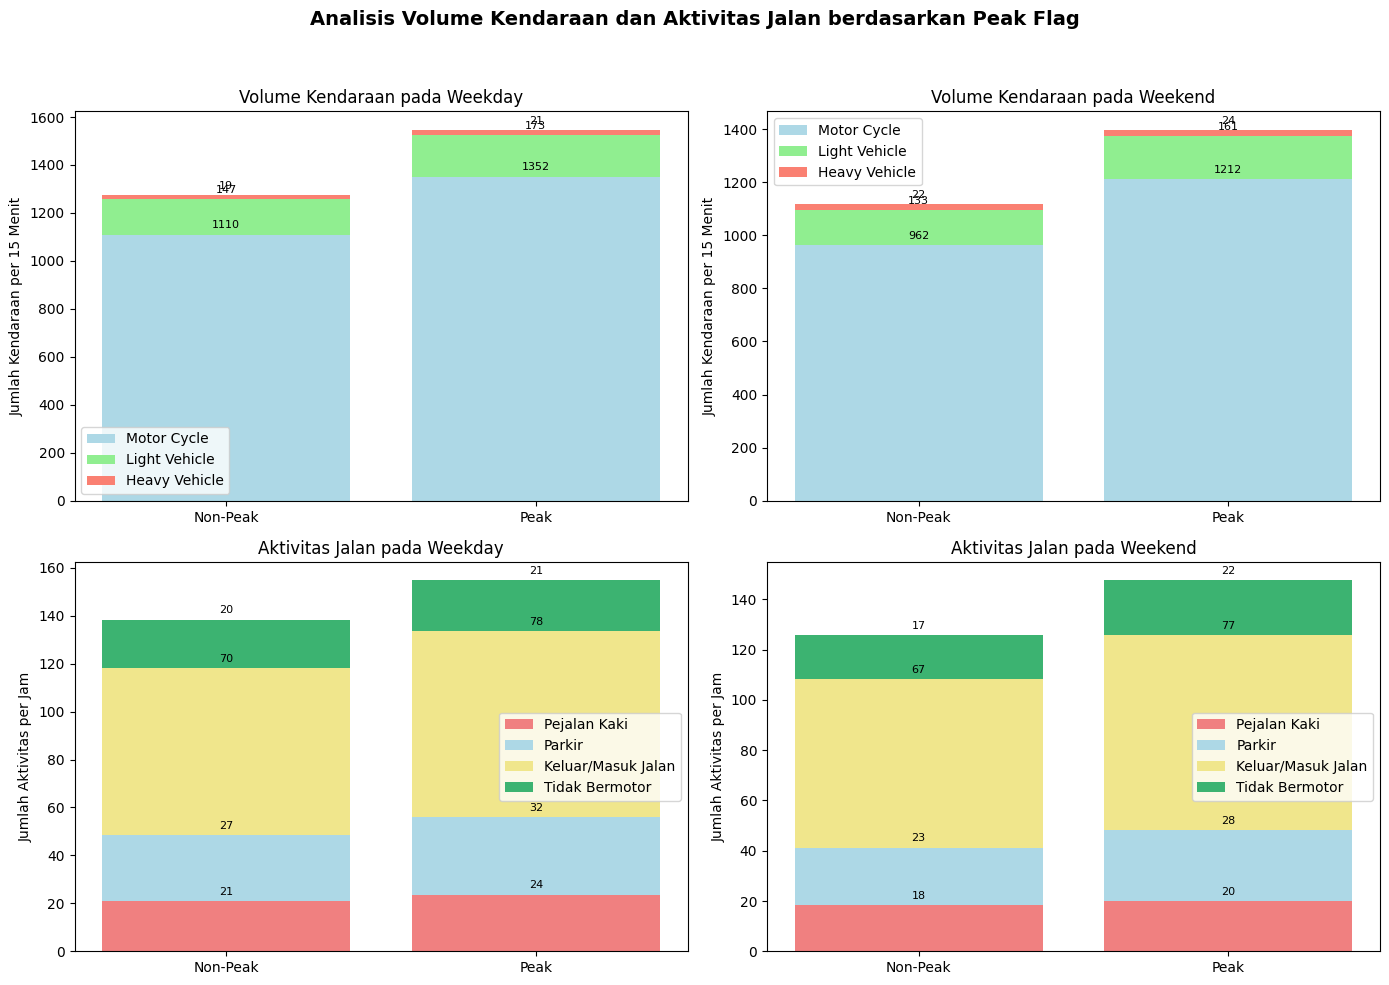

In [6]:
import matplotlib.pyplot as plt

# Fungsi bantu untuk menambahkan label di atas batang
def annotate_bar_values(ax, bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

# Membuat figure dan axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(
    'Analisis Volume Kendaraan dan Aktivitas Jalan berdasarkan Peak Flag',
    fontsize=14,
    fontweight='bold'
)

# --------- Gambar 4.1: Volume Kendaraan Weekday ---------
mc = axes[0, 0].bar(weekday_peak_traffic.index, weekday_peak_traffic['MC_Vehicle_kend/15menit_Weekday'], color='lightblue', label='Motor Cycle')
lv = axes[0, 0].bar(weekday_peak_traffic.index, weekday_peak_traffic['LV_Vehicle_kend/15menit_Weekday'], bottom=weekday_peak_traffic['MC_Vehicle_kend/15menit_Weekday'], color='lightgreen', label='Light Vehicle')
hv = axes[0, 0].bar(weekday_peak_traffic.index, weekday_peak_traffic['HV_Vehicle_kend/15menit_Weekday'], bottom=weekday_peak_traffic['MC_Vehicle_kend/15menit_Weekday'] + weekday_peak_traffic['LV_Vehicle_kend/15menit_Weekday'], color='salmon', label='Heavy Vehicle')
axes[0, 0].set_title('Volume Kendaraan pada Weekday')
axes[0, 0].set_ylabel('Jumlah Kendaraan per 15 Menit')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Non-Peak', 'Peak'])
axes[0, 0].legend()
[annotate_bar_values(axes[0, 0], bar_set) for bar_set in [mc, lv, hv]]

# --------- Gambar 4.2: Volume Kendaraan Weekend ---------
mc = axes[0, 1].bar(weekend_peak_traffic.index, weekend_peak_traffic['MC_Vehicle_kend/15menit_Weekend'], color='lightblue', label='Motor Cycle')
lv = axes[0, 1].bar(weekend_peak_traffic.index, weekend_peak_traffic['LV_Vehicle_kend/15menit_Weekend'], bottom=weekend_peak_traffic['MC_Vehicle_kend/15menit_Weekend'], color='lightgreen', label='Light Vehicle')
hv = axes[0, 1].bar(weekend_peak_traffic.index, weekend_peak_traffic['HV_Vehicle_kend/15menit_Weekend'], bottom=weekend_peak_traffic['MC_Vehicle_kend/15menit_Weekend'] + weekend_peak_traffic['LV_Vehicle_kend/15menit_Weekend'], color='salmon', label='Heavy Vehicle')
axes[0, 1].set_title('Volume Kendaraan pada Weekend')
axes[0, 1].set_ylabel('Jumlah Kendaraan per 15 Menit')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Non-Peak', 'Peak'])
axes[0, 1].legend()
[annotate_bar_values(axes[0, 1], bar_set) for bar_set in [mc, lv, hv]]

# --------- Gambar 4.3: Aktivitas Jalan Weekday ---------
ped = axes[1, 0].bar(roadside_activity_weekday.index, roadside_activity_weekday['RoadSideActivity_Pedestrian_Weekday'], color='lightcoral', label='Pejalan Kaki')
park = axes[1, 0].bar(roadside_activity_weekday.index, roadside_activity_weekday['RoadSideActivity_ParkStop_Weekday'], bottom=roadside_activity_weekday['RoadSideActivity_Pedestrian_Weekday'], color='lightblue', label='Parkir')
entry = axes[1, 0].bar(roadside_activity_weekday.index, roadside_activity_weekday['RoadSideActivity_ExitEntry_Weekday'], bottom=roadside_activity_weekday['RoadSideActivity_Pedestrian_Weekday'] + roadside_activity_weekday['RoadSideActivity_ParkStop_Weekday'], color='khaki', label='Keluar/Masuk Jalan')
nonmotor = axes[1, 0].bar(roadside_activity_weekday.index, roadside_activity_weekday['RoadSideActivity_NonMotor_Weekday'], bottom=roadside_activity_weekday['RoadSideActivity_Pedestrian_Weekday'] + roadside_activity_weekday['RoadSideActivity_ParkStop_Weekday'] + roadside_activity_weekday['RoadSideActivity_ExitEntry_Weekday'], color='mediumseagreen', label='Tidak Bermotor')
axes[1, 0].set_title('Aktivitas Jalan pada Weekday')
axes[1, 0].set_ylabel('Jumlah Aktivitas per Jam')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Non-Peak', 'Peak'])
axes[1, 0].legend()
[annotate_bar_values(axes[1, 0], bar_set) for bar_set in [ped, park, entry, nonmotor]]

# --------- Gambar 4.4: Aktivitas Jalan Weekend ---------
ped = axes[1, 1].bar(roadside_activity_weekend.index, roadside_activity_weekend['RoadSideActivity_Pedestrian_Weekend'], color='lightcoral', label='Pejalan Kaki')
park = axes[1, 1].bar(roadside_activity_weekend.index, roadside_activity_weekend['RoadSideActivity_ParkStop_Weekend'], bottom=roadside_activity_weekend['RoadSideActivity_Pedestrian_Weekend'], color='lightblue', label='Parkir')
entry = axes[1, 1].bar(roadside_activity_weekend.index, roadside_activity_weekend['RoadSideActivity_ExitEntry_Weekend'], bottom=roadside_activity_weekend['RoadSideActivity_Pedestrian_Weekend'] + roadside_activity_weekend['RoadSideActivity_ParkStop_Weekend'], color='khaki', label='Keluar/Masuk Jalan')
nonmotor = axes[1, 1].bar(roadside_activity_weekend.index, roadside_activity_weekend['RoadSideActivity_NonMotor_Weekend'], bottom=roadside_activity_weekend['RoadSideActivity_Pedestrian_Weekend'] + roadside_activity_weekend['RoadSideActivity_ParkStop_Weekend'] + roadside_activity_weekend['RoadSideActivity_ExitEntry_Weekend'], color='mediumseagreen', label='Tidak Bermotor')
axes[1, 1].set_title('Aktivitas Jalan pada Weekend')
axes[1, 1].set_ylabel('Jumlah Aktivitas per Jam')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Non-Peak', 'Peak'])
axes[1, 1].legend()
[annotate_bar_values(axes[1, 1], bar_set) for bar_set in [ped, park, entry, nonmotor]]

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Baca dataset terlebih dahulu (ganti path dengan path file kamu)
# df = pd.read_csv('nama_file.csv')

# Ganti nama fitur seperti yang kamu inginkan
features = [
    'MC_Vehicle_kend/15menit_Weekday', 'LV_Vehicle_kend/15menit_Weekday', 'HV_Vehicle_kend/15menit_Weekday',
    'Total_Vehicle_Count_Weekday', 'MC_PCU/Hour_Weekday', 'LV_PCU/Hour_Weekday',
    'HV_PCU/Hour_Weekday', 'Total_PCU/Hour_Weekday',
    'Spot_Speed_Weekday', 'Space_Mean_Speed_Weekday',
    'RoadSideActivity_Pedestrian_Weekday', 'RoadSideActivity_ParkStop_Weekday',
    'RoadSideActivity_ExitEntry_Weekday', 'RoadSideActivity_NonMotor_Weekday'
]

target = 'Peak_Flag_Weekday'

# Hilangkan baris kosong
df_model = df.dropna(subset=features + [target])

# Pisahkan fitur dan target
X = df_model[features]
y = df_model[target]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluasi
print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))
print("\n=== XGBoost ===")
print(classification_report(y_test, xgb_pred))


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.89      0.94         9

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [20:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Fitur yang diperbarui dengan penamaan baru
features = [
    'MC_Vehicle_kend/15menit_Weekday', 'LV_Vehicle_kend/15menit_Weekday', 'HV_Vehicle_kend/15menit_Weekday',
    'Total_Vehicle_Count_Weekday', 'MC_PCU/Hour_Weekday', 'LV_PCU/Hour_Weekday',
    'HV_PCU/Hour_Weekday', 'Total_PCU/Hour_Weekday',
    'Spot_Speed_Weekday', 'Space_Mean_Speed_Weekday',
    'RoadSideActivity_Pedestrian_Weekday', 'RoadSideActivity_ParkStop_Weekday',
    'RoadSideActivity_ExitEntry_Weekday', 'RoadSideActivity_NonMotor_Weekday'
]

# Load data
df = pd.read_excel(r"D:\1. SKRIPSI\Paling Baruu\Combined_Traffic_Data_Expanded.xlsx")

# Bersihkan data dari NaN
df_model = df.dropna(subset=features + ['Peak_Flag_Weekday'])

# Binarisasi target
df_model['Peak_Flag_Weekday_Binary'] = (df_model['Peak_Flag_Weekday'] > 0.5).astype(int)

# Siapkan variabel input dan target
X = df_model[features]
y_binary = df_model['Peak_Flag_Weekday_Binary']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (tanpa stratifikasi)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.25, random_state=42)

# Inisialisasi dan latih model
rf_model = RandomForestClassifier(random_state=42)


=== Cek Missing Value ===
Series([], dtype: int64)


=== Random Forest - Weekday ===
MAE: 53.648
RMSE: 71.179
R2: 0.860




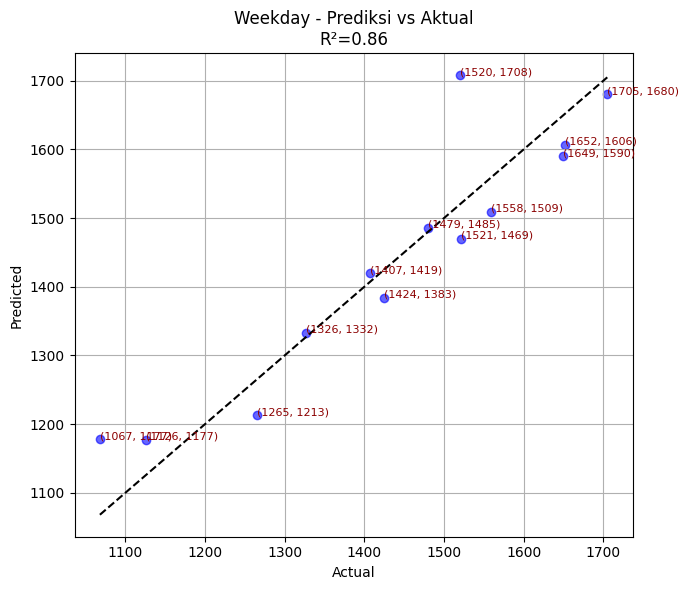

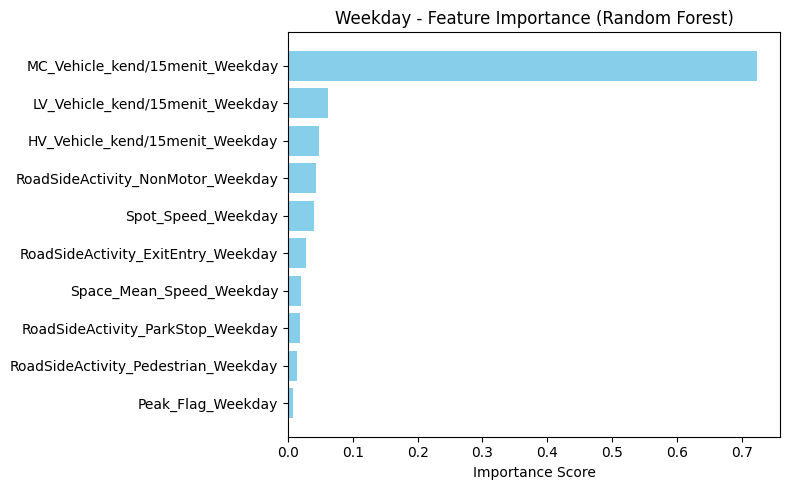

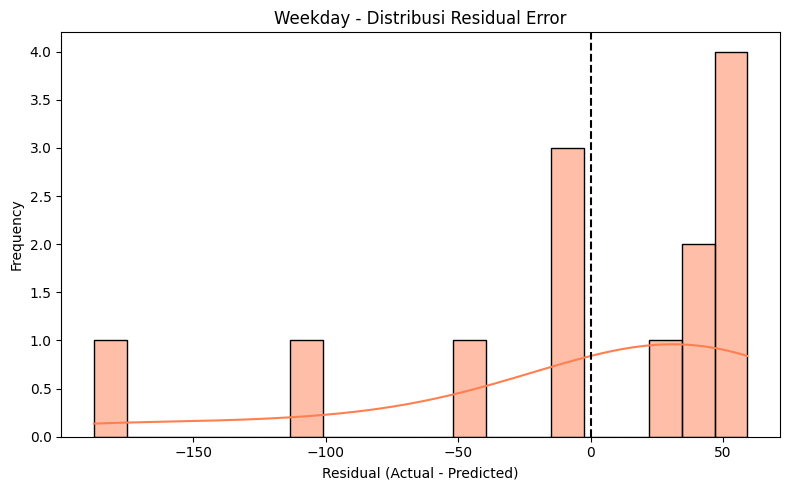

=== Random Forest - Weekend ===
MAE: 36.814
RMSE: 41.618
R2: 0.968




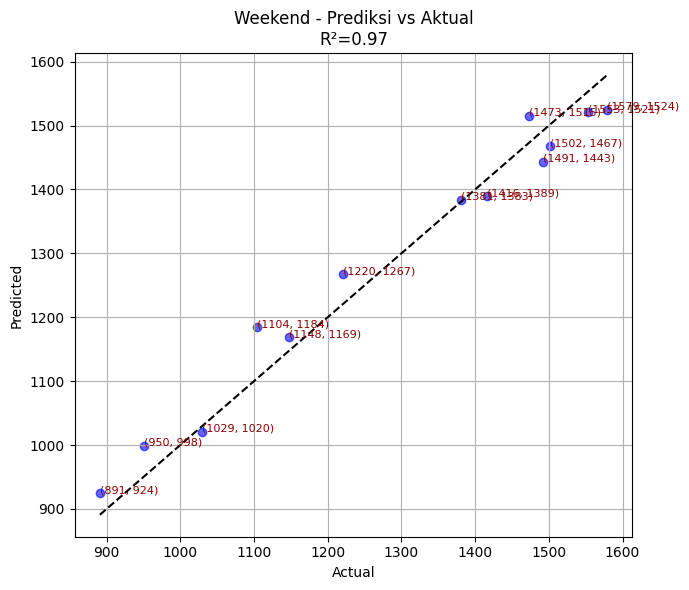

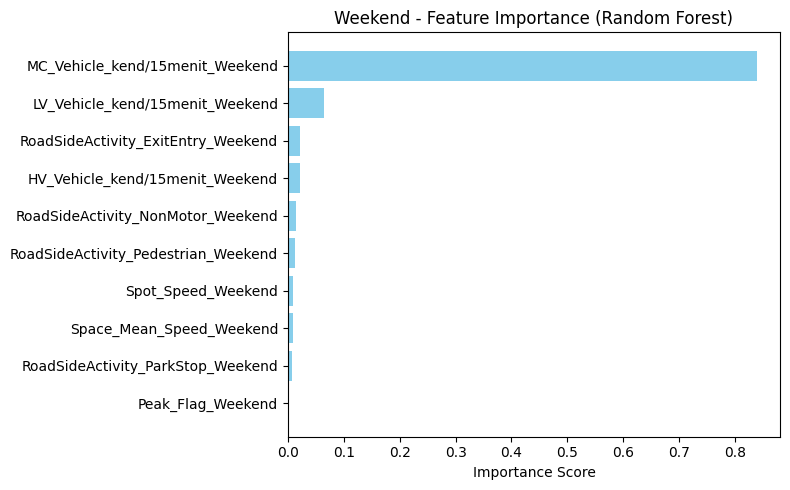

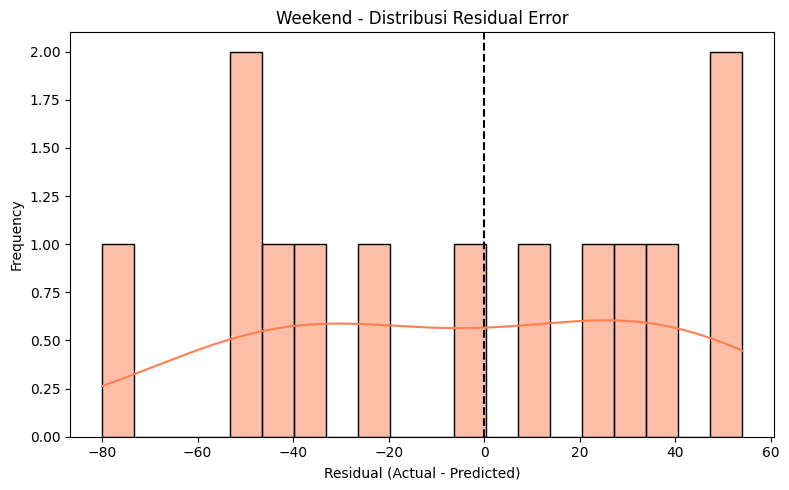

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# 1. Cek Missing Value
# =========================
print("=== Cek Missing Value ===")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])
print("\n")

# =========================
# 2. Membagi Data
# =========================
features_weekday = [
    'MC_Vehicle_kend/15menit_Weekday', 'LV_Vehicle_kend/15menit_Weekday', 'HV_Vehicle_kend/15menit_Weekday',
    'Spot_Speed_Weekday', 'Space_Mean_Speed_Weekday', 'Peak_Flag_Weekday',
    'RoadSideActivity_Pedestrian_Weekday', 'RoadSideActivity_ParkStop_Weekday',
    'RoadSideActivity_ExitEntry_Weekday', 'RoadSideActivity_NonMotor_Weekday'
]
target_weekday = 'Total_Vehicle_Count_Weekday'

features_weekend = [
    'MC_Vehicle_kend/15menit_Weekend', 'LV_Vehicle_kend/15menit_Weekend', 'HV_Vehicle_kend/15menit_Weekend',
    'Spot_Speed_Weekend', 'Space_Mean_Speed_Weekend', 'Peak_Flag_Weekend',
    'RoadSideActivity_Pedestrian_Weekend', 'RoadSideActivity_ParkStop_Weekend',
    'RoadSideActivity_ExitEntry_Weekend', 'RoadSideActivity_NonMotor_Weekend'
]
target_weekend = 'Total_Vehicle_Count_Weekend'

# =========================
# 3. Fungsi Training Random Forest
# =========================
def train_random_forest(data, features, target):
    df_clean = data.dropna(subset=features + [target])
    X = df_clean[features]
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_test, y_test, y_pred

# =========================
# 4. Evaluasi Metrik
# =========================
def get_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

# =========================
# 5. Visualisasi Scatter Prediksi vs Aktual
# =========================
def plot_evaluation(y_true, y_pred, label):
    plt.figure(figsize=(7, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    for actual, pred in zip(y_true, y_pred):
        plt.text(actual, pred, f'({int(actual)}, {int(pred)})', fontsize=8, color='darkred')
    plt.title(f'{label} - Prediksi vs Aktual\nR²={r2_score(y_true, y_pred):.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# =========================
# 6. Visualisasi Feature Importance
# =========================
def plot_feature_importance(features, importances, label):
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance_RF': importances
    }).sort_values(by='Importance_RF', ascending=False)
    plt.figure(figsize=(8, 5))
    plt.barh(importance_df['Feature'], importance_df['Importance_RF'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'{label} - Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# =========================
# 7. Visualisasi Distribusi Residual Error
# =========================
def plot_residual_distribution(y_true, y_pred, label):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=20, color='coral', edgecolor='black')
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f'{label} - Distribusi Residual Error')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# =========================
# 8. Jalankan Pipeline untuk Weekday & Weekend
# =========================
for features, target, label in [
    (features_weekday, target_weekday, 'Weekday'),
    (features_weekend, target_weekend, 'Weekend')
]:
    print(f"=== Random Forest - {label} ===")
    model, X_test, y_test, y_pred = train_random_forest(df, features, target)
    metrics = get_metrics(y_test, y_pred)
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")
    print("\n")
    plot_evaluation(y_test, y_pred, label)
    plot_feature_importance(features, model.feature_importances_, label)
    plot_residual_distribution(y_test, y_pred, label)


In [20]:
import seaborn as sns

def plot_residual_distribution(y_true, y_pred, label):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=20, color='coral', edgecolor='black')
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f'{label} - Distribusi Residual Error')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


=== Cek Missing Value ===
Series([], dtype: int64)



=== XGBoost - Weekday ===
MAE: 67.570
RMSE: 95.016
R2: 0.750


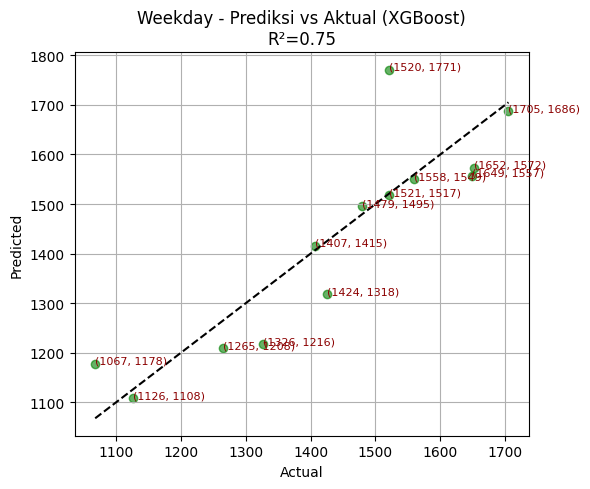

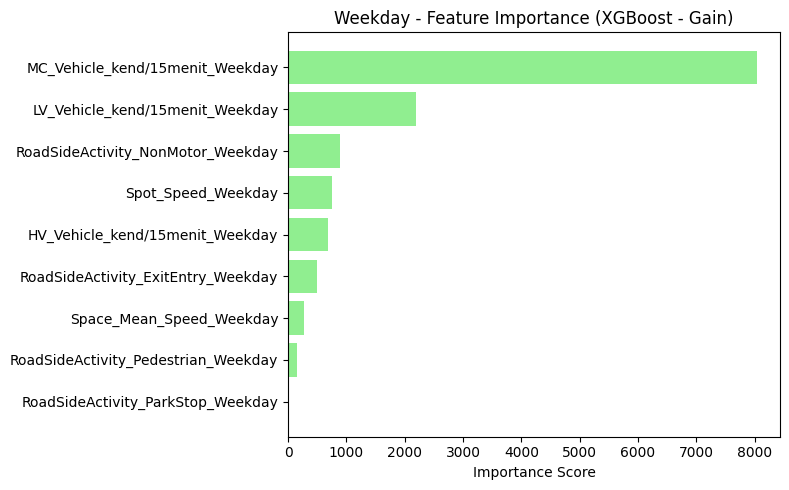


=== XGBoost - Weekend ===
MAE: 35.024
RMSE: 42.293
R2: 0.967


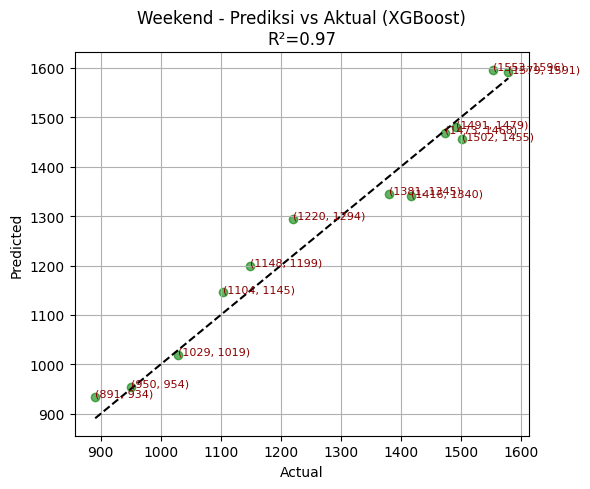

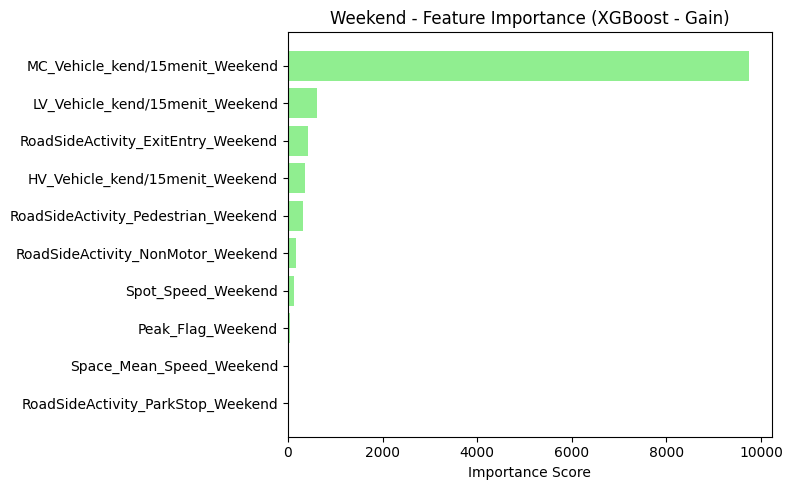

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ========================================
# 1. Cek Missing Value
# ========================================
print("=== Cek Missing Value ===")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])
print("\n")

# ========================================
# 2. Membagi Data
# ========================================
features_weekday = [
    'MC_Vehicle_kend/15menit_Weekday', 'LV_Vehicle_kend/15menit_Weekday', 'HV_Vehicle_kend/15menit_Weekday',
    'Spot_Speed_Weekday', 'Space_Mean_Speed_Weekday', 'Peak_Flag_Weekday',
    'RoadSideActivity_Pedestrian_Weekday', 'RoadSideActivity_ParkStop_Weekday',
    'RoadSideActivity_ExitEntry_Weekday', 'RoadSideActivity_NonMotor_Weekday'
]
target_weekday = 'Total_Vehicle_Count_Weekday'

features_weekend = [
    'MC_Vehicle_kend/15menit_Weekend', 'LV_Vehicle_kend/15menit_Weekend', 'HV_Vehicle_kend/15menit_Weekend',
    'Spot_Speed_Weekend', 'Space_Mean_Speed_Weekend', 'Peak_Flag_Weekend',
    'RoadSideActivity_Pedestrian_Weekend', 'RoadSideActivity_ParkStop_Weekend',
    'RoadSideActivity_ExitEntry_Weekend', 'RoadSideActivity_NonMotor_Weekend'
]
target_weekend = 'Total_Vehicle_Count_Weekend'

# ========================================
# 3. Fungsi Prediksi dengan XGBoost
# ========================================
def train_xgboost(data, features, target):
    df_clean = data.dropna(subset=features + [target])
    X = df_clean[features]
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(random_state=42, objective='reg:squarederror')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return model, X_test, y_test, y_pred

# ========================================
# 4. Evaluasi Metrik
# ========================================
def get_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

# ========================================
# 5. Visualisasi Prediksi vs Aktual
# ========================================
def plot_evaluation(y_true, y_pred, label):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, color='green', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    for actual, pred in zip(y_true, y_pred):
        plt.text(actual, pred, f'({int(actual)}, {int(pred)})', fontsize=8, color='darkred')
    plt.title(f'{label} - Prediksi vs Aktual (XGBoost)\nR²={r2_score(y_true, y_pred):.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ========================================
# 6. Visualisasi Feature Importance (XGBoost)
# ========================================
def plot_feature_importance_xgb(model, label):
    booster = model.get_booster()
    score = booster.get_score(importance_type='gain')
    xgb_importance_df = pd.DataFrame.from_dict(score, orient='index', columns=['Importance'])
    xgb_importance_df.index.name = 'Feature'
    xgb_importance_df.reset_index(inplace=True)
    xgb_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    plt.figure(figsize=(8, 5))
    plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='lightgreen')
    plt.gca().invert_yaxis()
    plt.title(f'{label} - Feature Importance (XGBoost - Gain)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

    return xgb_importance_df

# ========================================
# 7. Jalankan Pipeline untuk Weekday dan Weekend
# ========================================
for features, target, label in [
    (features_weekday, target_weekday, 'Weekday'),
    (features_weekend, target_weekend, 'Weekend')
]:
    print(f"\n=== XGBoost - {label} ===")
    model, X_test, y_test, y_pred = train_xgboost(df, features, target)

    # Evaluasi metrik
    metrics = get_metrics(y_test, y_pred)
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")

    # Visualisasi hasil
    plot_evaluation(y_test, y_pred, label)
    _ = plot_feature_importance_xgb(model, label)


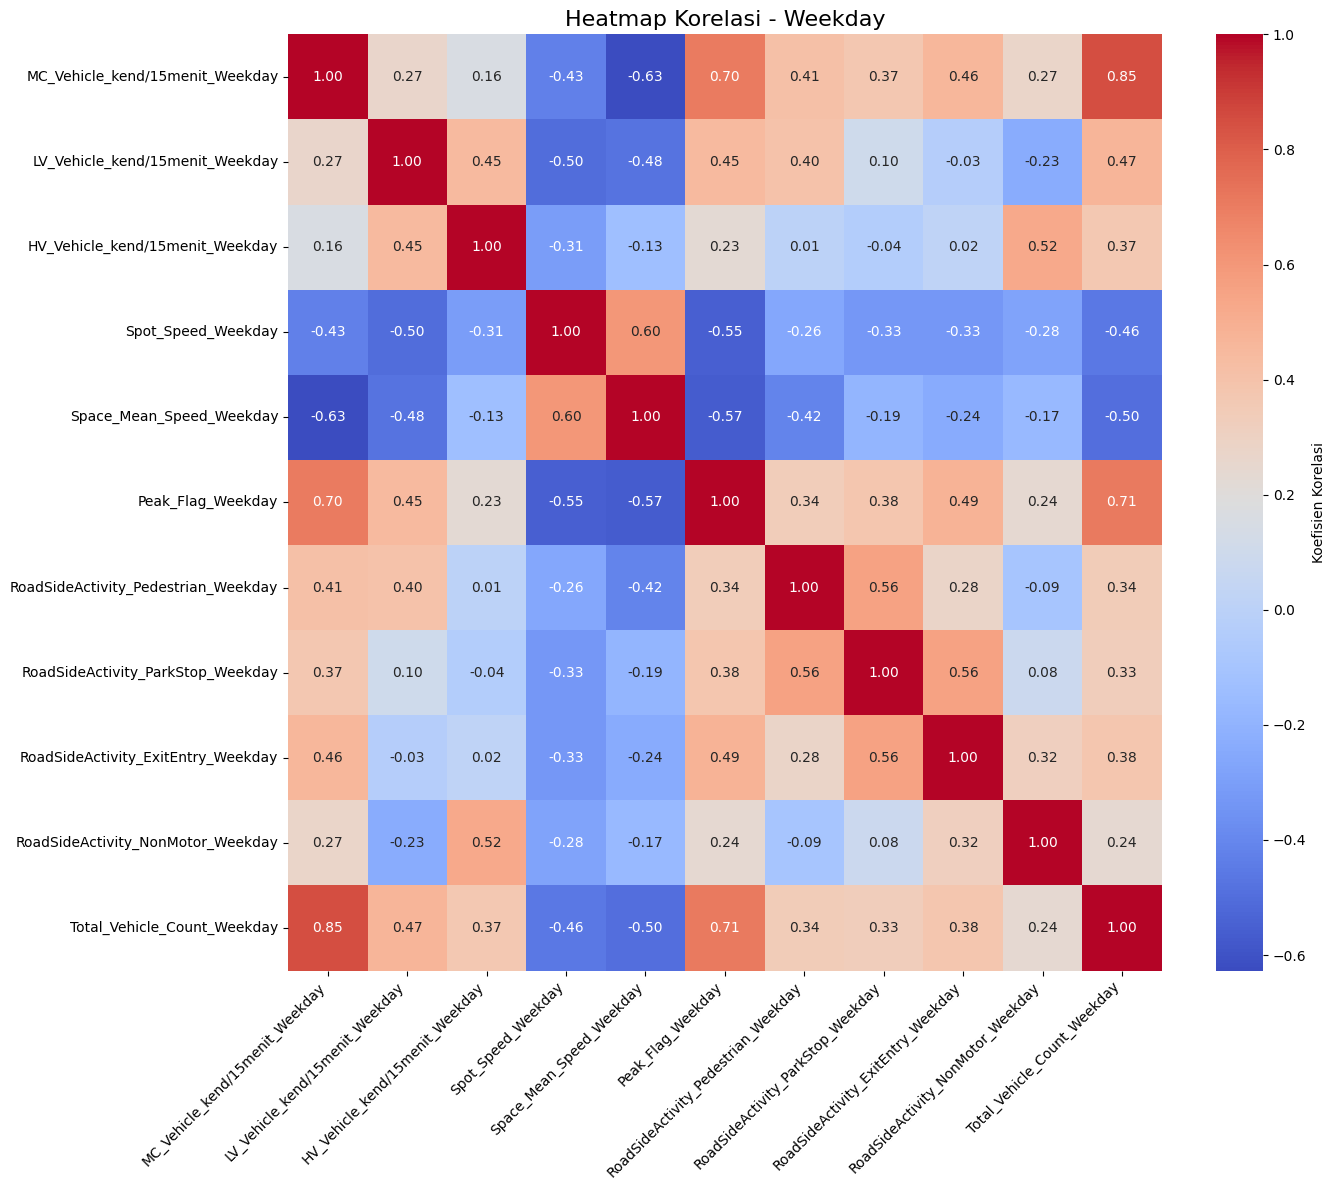

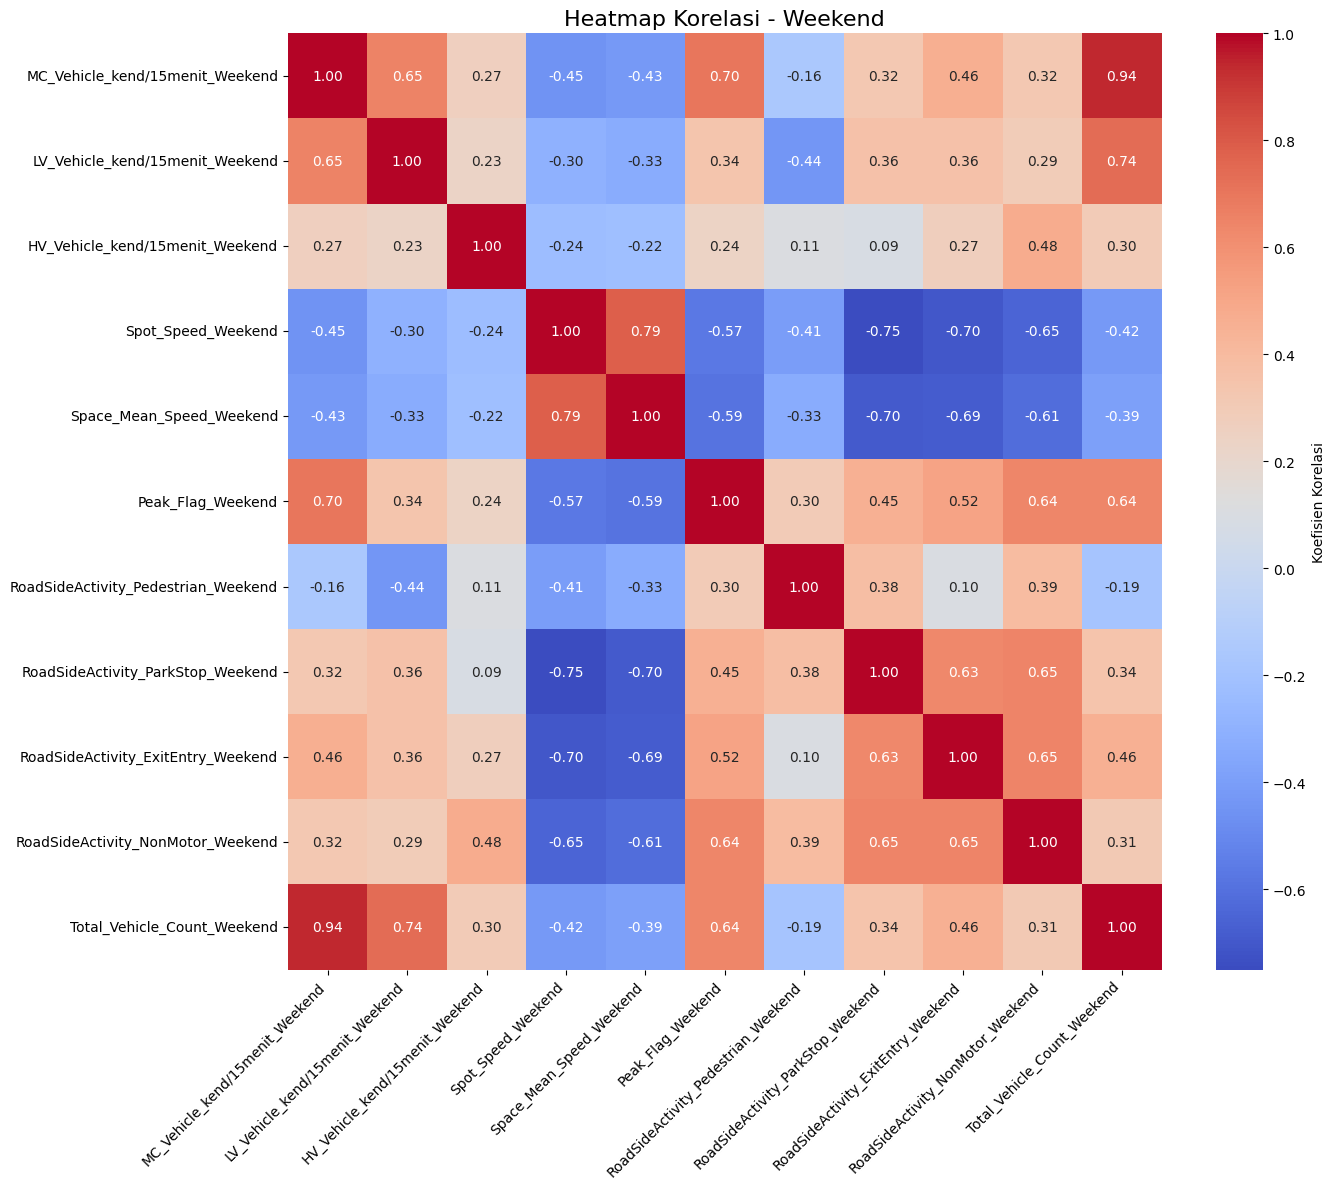

In [12]:
import seaborn as sns
# Heatmap untuk Weekday
plt.figure(figsize=(14, 12))
sns.heatmap(
    df[features_weekday + [target_weekday]].corr(),
    annot=True, fmt=".2f", cmap="coolwarm",
    annot_kws={"size": 10},
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title("Heatmap Korelasi - Weekday", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Heatmap untuk Weekend
plt.figure(figsize=(14, 12))
sns.heatmap(
    df[features_weekend + [target_weekend]].corr(),
    annot=True, fmt=".2f", cmap="coolwarm",
    annot_kws={"size": 10},
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title("Heatmap Korelasi - Weekend", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [19]:
import pandas as pd

# Data hasil evaluasi model
data = {
    'Model': ['Random Forest', 'Random Forest', 'XGBoost', 'XGBoost'],
    'Kondisi': ['Weekday', 'Weekend', 'Weekday', 'Weekend'],
    'MAE': [53.648, 36.814, 67.570, 35.024],
    'RMSE': [71.179, 41.618, 95.016, 42.293],
    'R²': [0.860, 0.968, 0.750, 0.967]
}

# Buat DataFrame
df_eval = pd.DataFrame(data)

# Tampilkan tabel dengan styling garis
styled_table = df_eval.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('border', '1px solid black'), ('font-weight', 'bold'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]}
    ]
).set_properties(**{'border': '1px solid black', 'color': 'black'})

styled_table


,Model,Kondisi,MAE,RMSE,R²
0,Random Forest,Weekday,53.648000,71.179000,0.860000
1,Random Forest,Weekend,36.814000,41.618000,0.968000
2,XGBoost,Weekday,67.570000,95.016000,0.750000
3,XGBoost,Weekend,35.024000,42.293000,0.967000


In [17]:
# Misal sudah ada df, features, dan target
model_weekday, X_test_wd, y_test_wd, y_pred_wd = train_random_forest(df, features_weekday, target_weekday)
model_weekend, X_test_we, y_test_we, y_pred_we = train_random_forest(df, features_weekend, target_weekend)

# Simpan model yang sudah fit
import joblib
joblib.dump(model_weekday, "model_weekday.pkl")
joblib.dump(model_weekend, "model_weekend.pkl")


['model_weekend.pkl']

In [18]:
!pip install sharp


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build sharp


  error: subprocess-exited-with-error
  
  × Building wheel for sharp (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      C:\Users\Asus\AppData\Local\Temp\pip-build-env-q_s1lc65\overlay\Lib\site-packages\setuptools\_distutils\extension.py:150: UserWarning: Unknown Extension options: 'include_dir'
        warnings.warn(msg)
      C:\Users\Asus\AppData\Local\Temp\pip-build-env-q_s1lc65\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              **************************